In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')





In [13]:
# Step 3: Merge the transactions with product categories
transactions_with_categories = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID', how='left')

# Step 4: Summarize spending by customer and category
category_spending = transactions_with_categories.groupby(['CustomerID', 'Category']).agg(
    total_spent=('TotalValue', 'sum')
).reset_index()

# Pivot the table so each row is a customer and each column is a product category
category_spending_pivot = category_spending.pivot_table(
    index='CustomerID',
    columns='Category',
    values='total_spent',
    fill_value=0
)


In [14]:
# Step 5: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(category_spending_pivot)


In [15]:
# Step 6: Apply KMeans Clustering (Choose the number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)  # Example with 4 clusters
category_spending_pivot['Cluster'] = kmeans.fit_predict(scaled_data)

In [16]:
# Step 7: Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(scaled_data, category_spending_pivot['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24813378403957162


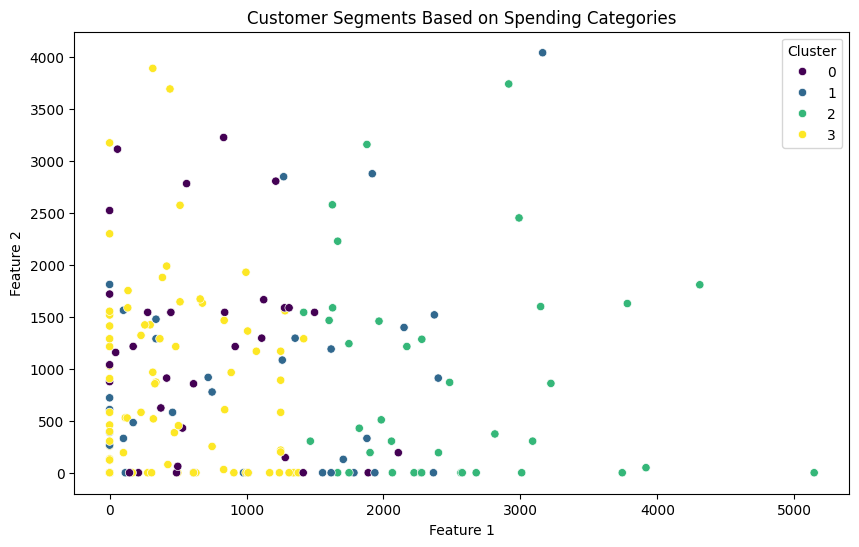

In [17]:
# Step 8: Visualize the clusters (Optional, for 2D visualization)
plt.figure(figsize=(10,6))
sns.scatterplot(x=category_spending_pivot.iloc[:, 0], y=category_spending_pivot.iloc[:, 1],
                hue=category_spending_pivot['Cluster'], palette='viridis')
plt.title('Customer Segments Based on Spending Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Cluster")
plt.show()


In [18]:
# Step 9: Save the clustered data to a CSV file
category_spending_pivot.to_csv('Customer_Clusters.csv', index=True)

In [19]:
# Step 10: Optional: Show cluster centers (to understand the centers of the clusters)
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[-0.32689122  0.25858393  0.02732364  1.63166603]
 [ 0.04628516 -0.01296498  1.67443839 -0.5450457 ]
 [ 1.49950456  0.04555694 -0.36756127 -0.22189397]
 [-0.52036744 -0.11762679 -0.50690741 -0.34701563]]
